# Task 2 - Prediction of store sales

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Loding Data

In [2]:
test_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\test.csv")
train_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Train.csv")
store_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Store.csv")
sample_data=pd.read_csv(r"C:\Users\shita\OneDrive\Desktop\Sample_Submission.csv")


In [3]:
test_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,17-09-2015,1.0,1,0,0
1,2,3,4,17-09-2015,1.0,1,0,0
2,3,7,4,17-09-2015,1.0,1,0,0
3,4,8,4,17-09-2015,1.0,1,0,0
4,5,9,4,17-09-2015,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,01-08-2015,1.0,0,0,0
41084,41085,1112,6,01-08-2015,1.0,0,0,0
41085,41086,1113,6,01-08-2015,1.0,0,0,0
41086,41087,1114,6,01-08-2015,1.0,0,0,0


In [4]:
train_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1
1017205,1112,2,01-01-2013,0,0,0,0,a,1
1017206,1113,2,01-01-2013,0,0,0,0,a,1
1017207,1114,2,01-01-2013,0,0,0,0,a,1


In [5]:
store_data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
sample_data

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [7]:
train_data.shape

(1017209, 9)

In [8]:
test_data.shape

(41088, 8)

In [9]:
store_data.shape

(1115, 10)

In [10]:
sample_data.shape

(41088, 2)

In [11]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [12]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,17-09-2015,1.0,1,0,0
1,2,3,4,17-09-2015,1.0,1,0,0
2,3,7,4,17-09-2015,1.0,1,0,0
3,4,8,4,17-09-2015,1.0,1,0,0
4,5,9,4,17-09-2015,1.0,1,0,0


In [13]:
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [14]:
sample_data.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [15]:
test_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [16]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [17]:
store_data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
sample_data.columns

Index(['Id', 'Sales'], dtype='object')

Merge Data


store data merging with train data.

In [19]:
common_key = 'Store'

In [20]:
train_merged_data = pd.merge(train_data, store_data, on=common_key, how='left')
train_merged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01-01-2013,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,01-01-2013,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,01-01-2013,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,01-01-2013,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [21]:
train_merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31-07-2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31-07-2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31-07-2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31-07-2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [23]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [24]:
train_merged_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [25]:
train_merged_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [26]:
test_merged_data= pd.merge(test_data, store_data, on=common_key, how='left')

test_merged_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,17-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,17-09-2015,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,17-09-2015,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,17-09-2015,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,17-09-2015,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,01-08-2015,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,01-08-2015,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,01-08-2015,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,01-08-2015,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
test_merged_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,17-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,17-09-2015,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,17-09-2015,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,17-09-2015,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,17-09-2015,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [28]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [29]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        40992 non-null  float64
 11  CompetitionOpenSinceMonth  25872 non-null  float64
 12  CompetitionOpenSinceYear   25872 non-null  float64
 13  Promo2                     41088 non-null  int

In [30]:
test_merged_data.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [31]:
test_merged_data.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [32]:
train_merged_data['Date'] = pd.to_datetime(train_merged_data['Date'])

test_merged_data['Date'] = pd.to_datetime(test_merged_data['Date'])


In [33]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

2.1 Preprocessing

It is important to process the data into a format where it can be fed to a machine learning model. 
This typically means converting all non-numeric columns to numeric, handling NaN values and generating new
features from already existing features. In our case, you have a few datetime columns to preprocess.
you can extract the following from them:

weekdays

weekends

number of days to holidays

Number of days after holiday

Beginning of month, mid month and ending of month

(think of more features to extract), extra marks for it As a final thing, you have to scale the data 
This helps with predictions especially when using machine learning algorithms that use Euclidean distances.
you can use the standard scaler in sklearn for this.

In [34]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [35]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [36]:
# Extract features from the 'Date' column for both train and test data
# Extract Year
train_merged_data['Year'] = train_merged_data['Date'].dt.year

test_merged_data['Year'] = test_merged_data['Date'].dt.year

In [37]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [38]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [39]:
# Extract Month
train_merged_data['Month'] = train_merged_data['Date'].dt.month

test_merged_data['Month'] = test_merged_data['Date'].dt.month

In [40]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [41]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [42]:
# Extract Day
train_merged_data['weekDay'] = train_merged_data['Date'].dt.day

test_merged_data['weekDay'] = test_merged_data['Date'].dt.day

In [43]:
# Create a feature for Weekday (1=Weekday, 0=Weekend)
train_merged_data['IsWeekday'] = (train_merged_data['DayOfWeek'] < 5).astype(int)

test_merged_data['IsWeekday'] = (test_merged_data['DayOfWeek'] < 5).astype(int)


In [44]:

train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [45]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [46]:
# Extract Quarter
train_merged_data['Quarter'] = train_merged_data['Date'].dt.quarter

test_merged_data['Quarter'] = test_merged_data['Date'].dt.quarter

In [47]:
train_merged_data['SalesPerCustomer'] = train_merged_data['Sales'] / train_merged_data['Customers']

In [48]:
# Extract features for the beginning, middle, and end of the month

train_merged_data['IsMonthStart'] = train_merged_data['Date'].dt.is_month_start.astype(int)

train_merged_data['IsMonthMiddle'] = ((train_merged_data['weekDay'] >= 10) & (train_merged_data['weekDay'] <= 20)).astype(int)

train_merged_data['IsMonthEnd'] = train_merged_data['Date'].dt.is_month_end.astype(int)


In [49]:
test_merged_data['IsMonthStart'] = test_merged_data['Date'].dt.is_month_start.astype(int)

test_merged_data['IsMonthMiddle'] = ((test_merged_data['weekDay'] >= 10) & (test_merged_data['weekDay'] <= 20)).astype(int)

test_merged_data['IsMonthEnd'] = test_merged_data['Date'].dt.is_month_end.astype(int)


In [50]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [51]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  object        
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  object        
 9   Assortment                 41088 non-null  object        
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [52]:
train_merged_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,2015,7,31,0,3,9.482883,0,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,0,3,9.702400,0,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,"Jan,Apr,Jul,Oct",2015,7,31,0,3,10.126675,0,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,2015,7,31,0,3,9.342457,0,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,2015,7,31,0,3,8.626118,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,"Jan,Apr,Jul,Oct",2013,1,1,1,1,NaN,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,NaN,2013,1,1,1,1,NaN,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,2013,1,1,1,1,NaN,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,2013,1,1,1,1,NaN,1,0,0


In [53]:
test_merged_data

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,NaN,NaN,2015,9,17,1,3,0,1,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,1,3,0,1,0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,2015,9,17,1,3,0,1,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,NaN,NaN,2015,9,17,1,3,0,1,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,2015,9,17,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-01-08,1.0,0,0,0,a,a,...,2013.0,"Jan,Apr,Jul,Oct",2015,1,8,0,1,0,0,0
41084,41085,1112,6,2015-01-08,1.0,0,0,0,c,c,...,NaN,NaN,2015,1,8,0,1,0,0,0
41085,41086,1113,6,2015-01-08,1.0,0,0,0,a,c,...,NaN,NaN,2015,1,8,0,1,0,0,0
41086,41087,1114,6,2015-01-08,1.0,0,0,0,a,c,...,NaN,NaN,2015,1,8,0,1,0,0,0


In [54]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [55]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(str)


In [56]:
categorical_columns_test = [var for var in test_merged_data.columns if test_merged_data[var].dtypes=='O']

numerical_columns_test = [var for var in test_merged_data.columns if test_merged_data[var].dtypes!='O']


In [57]:
categorical_columns_test



['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [58]:
numerical_columns_test



['Id',
 'Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'weekDay',
 'IsWeekday',
 'Quarter',
 'IsMonthStart',
 'IsMonthMiddle',
 'IsMonthEnd']

In [59]:
categorical_columns_train = [var for var in train_merged_data.columns if train_merged_data[var].dtypes=='O']

numerical_columns_train = [var for var in train_merged_data.columns if train_merged_data[var].dtypes!='O']


In [60]:
categorical_columns_train


['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

In [61]:
numerical_columns_train

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'weekDay',
 'IsWeekday',
 'Quarter',
 'SalesPerCustomer',
 'IsMonthStart',
 'IsMonthMiddle',
 'IsMonthEnd']

In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_merged_data['StoreType'] = label_encoder.fit_transform(train_merged_data['StoreType'])
train_merged_data['StateHoliday'] = label_encoder.fit_transform(train_merged_data['StateHoliday'])
train_merged_data['Assortment'] = label_encoder.fit_transform(train_merged_data['Assortment'])
train_merged_data['PromoInterval'] = label_encoder.fit_transform(train_merged_data['PromoInterval'])

In [63]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(str)


In [64]:
train_merged_data['StateHoliday'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [65]:
test_merged_data['StateHoliday'] = label_encoder.fit_transform(test_merged_data['StateHoliday'])

test_merged_data['StoreType'] = label_encoder.fit_transform(test_merged_data['StoreType'])

test_merged_data['StateHoliday'] = label_encoder.fit_transform(test_merged_data['StateHoliday'])

test_merged_data['Assortment'] = label_encoder.fit_transform(test_merged_data['Assortment'])

test_merged_data['PromoInterval'] = label_encoder.fit_transform(test_merged_data['PromoInterval'])

In [66]:
test_merged_data['StoreType'] =label_encoder.fit_transform(test_merged_data['StoreType'])


In [67]:
test_merged_data['StateHoliday'].unique()

array([0, 1], dtype=int64)

In [68]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [69]:
train_merged_data['StateHoliday'] = train_merged_data['StateHoliday'].astype(int)


In [70]:
test_merged_data['StateHoliday'] = test_merged_data['StateHoliday'].astype(int)


In [71]:
test_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Id                         41088 non-null  int64         
 1   Store                      41088 non-null  int64         
 2   DayOfWeek                  41088 non-null  int64         
 3   Date                       41088 non-null  datetime64[ns]
 4   Open                       41077 non-null  float64       
 5   Promo                      41088 non-null  int64         
 6   StateHoliday               41088 non-null  int32         
 7   SchoolHoliday              41088 non-null  int64         
 8   StoreType                  41088 non-null  int64         
 9   Assortment                 41088 non-null  int32         
 10  CompetitionDistance        40992 non-null  float64       
 11  CompetitionOpenSinceMonth  25872 non-null  float64       
 12  Comp

In [72]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 27 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int32         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int32         
 10  Assortment                 1017209 non-null  int32         
 11  CompetitionDistance        1014567 no

In [73]:
test_merged_data.shape

(41088, 25)

In [74]:
train_merged_data.shape

(1017209, 27)

In [75]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'weekDay',
       'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [76]:
test_merged_data.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [77]:
# Drop columns from train_data_merged

train_merged_data.drop(columns=['Sales', 'Customers'], inplace=True)

# Drop columns from test_data_merged

test_merged_data.drop(columns=['Id'], inplace=True)

In [78]:
train_merged_data.set_index('Date', inplace=True)

train_merged_data.sort_index(inplace=True)

In [79]:
test_merged_data.set_index('Date', inplace=True)

test_merged_data.sort_index(inplace=True)

In [80]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler

scaler = StandardScaler()

In [81]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

In [82]:
# Apply Min-Max scaling to train_merged_data

train_merged_data_scaled = scaler.fit_transform(train_merged_data)

In [83]:
# Apply Min-Max scaling to test_merged_data

test_merged_data_scaled = scaler.fit_transform(test_merged_data)

2.2 Building models with sklearn pipelines At this point, all our features are numeric. 

Since our problem is a regression problem, you can narrow down the list of algorithms you can use for modelling.
A reasonable starting point will be to use any of the tree based algorithms. 
Random forests Regressor will make for a good start. Also, for the sake of this challenge, work with sklearn pipelines. 
This makes modeling modular and more reproducible. Working with pipelines will also significantly reduce your workload
when you are moving your setup into files for the next part of the challenge. Extra marks will be awarded for doing this.


2.3 Choose a loss function

Loss functions indicate how well our model is performing. This means that the loss functions affect 
the overall output of sales prediction. Different loss functions have different use cases.

In this challenge, you’re allowed to choose your own loss function.
you need to defend the loss function you choose for this challenge. Feel free to be creative with your choice.
You might want to use loss functions that are easily interpretable.

In [84]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer

In [85]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-12-07
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  int32  
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  int32  
 7   Assortment                 1017209 non-null  int32  
 8   CompetitionDistance        1014567 non-null  float64
 9   CompetitionOpenSinceMonth  693861 non-null   float64
 10  CompetitionOpenSinceYear   693861 non-null   float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            509178 non-null   float64
 1

In [86]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [87]:
# Define features and target variable

X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]

y = train_merged_data['SalesPerCustomer']

In [88]:
#Create the train and test splits the right way for time series data

split_size = int(0.8 * len(X)) # 80 % for training

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]

# Create the test split
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(813767, 203442, 813767, 203442)

In [89]:
# Making separate lists for categorical and numerical columns

categorical_cols, numerical_cols = [], []

for i in train_merged_data.columns:
    
    print("The datatype for {} is {}".format(i,train_merged_data[i].dtypes))
    
    # check if the datatype is object or not
    
    if train_merged_data[i].dtypes == "object":
        
        # if the datatype is object : --> fillna with mode of that column
        
        mode_value = train_merged_data[i].mode()[0]
        
        train_merged_data[i].fillna(mode_value, inplace = True)
        
    elif train_merged_data[i].dtypes != "object":
        
        # if data[i].dtypes == "bool":
        
        #     data[i].fillna(0, inplace = True)
        
        # else:
        
        # else if the datatype is numerical : --> fillna with mean of that column
        
        mean_value = train_merged_data[i].mean()
        
        train_merged_data[i].fillna(mean_value, inplace = True)


The datatype for Store is int64
The datatype for DayOfWeek is int64
The datatype for Open is int64
The datatype for Promo is int64
The datatype for StateHoliday is int32
The datatype for SchoolHoliday is int64
The datatype for StoreType is int32
The datatype for Assortment is int32
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is int32
The datatype for Year is int64
The datatype for Month is int64
The datatype for weekDay is int64
The datatype for IsWeekday is int32
The datatype for Quarter is int64
The datatype for SalesPerCustomer is float64
The datatype for IsMonthStart is int32
The datatype for IsMonthMiddle is int32
The datatype for IsMonthEnd is int32


In [90]:
# Making separate lists for categorical and numerical columns

categorical_cols, numerical_cols = [], []

for i in test_merged_data.columns:
    
    print("The datatype for {} is {}".format(i,test_merged_data[i].dtypes))
    
    # check if the datatype is object or not
    
    if test_merged_data[i].dtypes == "object":
        
        # if the datatype is object : --> fillna with mode of that column
        
        mode_value = test_merged_data[i].mode()[0]
        
        test_merged_data[i].fillna(mode_value, inplace = True)
        
    elif test_merged_data[i].dtypes != "object":
        
        mean_value = test_merged_data[i].mean()
        
        test_merged_data[i].fillna(mean_value, inplace = True)
        



The datatype for Store is int64
The datatype for DayOfWeek is int64
The datatype for Open is float64
The datatype for Promo is int64
The datatype for StateHoliday is int32
The datatype for SchoolHoliday is int64
The datatype for StoreType is int64
The datatype for Assortment is int32
The datatype for CompetitionDistance is float64
The datatype for CompetitionOpenSinceMonth is float64
The datatype for CompetitionOpenSinceYear is float64
The datatype for Promo2 is int64
The datatype for Promo2SinceWeek is float64
The datatype for Promo2SinceYear is float64
The datatype for PromoInterval is int32
The datatype for Year is int64
The datatype for Month is int64
The datatype for weekDay is int64
The datatype for IsWeekday is int32
The datatype for Quarter is int64
The datatype for IsMonthStart is int32
The datatype for IsMonthMiddle is int32
The datatype for IsMonthEnd is int32


In [91]:
train_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-12-07
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Open                       1017209 non-null  int64  
 3   Promo                      1017209 non-null  int64  
 4   StateHoliday               1017209 non-null  int32  
 5   SchoolHoliday              1017209 non-null  int64  
 6   StoreType                  1017209 non-null  int32  
 7   Assortment                 1017209 non-null  int32  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 1

In [92]:
test_merged_data.info

<bound method DataFrame.info of             Store  DayOfWeek  Open  Promo  StateHoliday  SchoolHoliday  \
Date                                                                     
2015-01-08   1115          6   1.0      0             0              1   
2015-01-08    378          6   1.0      0             0              0   
2015-01-08    377          6   1.0      0             0              0   
2015-01-08    373          6   1.0      0             0              0   
2015-01-08    372          6   1.0      0             0              0   
...           ...        ...   ...    ...           ...            ...   
2015-12-09    729          6   1.0      0             0              0   
2015-12-09    728          6   1.0      0             0              0   
2015-12-09    727          6   1.0      0             0              0   
2015-12-09    724          6   1.0      0             0              0   
2015-12-09   1114          6   1.0      0             0              0   

     

In [93]:
test_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd'],
      dtype='object')

In [94]:
train_merged_data.columns

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

In [95]:
X =train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart', 'IsMonthMiddle',
       'IsMonthEnd']]

y = train_merged_data['SalesPerCustomer']

In [96]:
#Create the train and test splits the right way for time series data

split_size = int(0.8 * len(X)) # 80 % for training

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]

# Create the test split
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(813767, 203442, 813767, 203442)

In [98]:
# Remove rows with missing values
x_train = train_merged_data.dropna(subset=X.columns)

X_train = train_merged_data.dropna(subset=X.columns)

y_train = X_train['SalesPerCustomer']

X_train = X_train.drop(columns=['SalesPerCustomer'])

In [135]:
#Create the train and test splits the right way for time series data

split_size = int(0.8 * len(X)) # 80 % for training

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]

# Create the test split
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(813767, 203442, 813767, 203442)

In [100]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

regressor = LinearRegression()

In [101]:
pipeline = Pipeline([
    ('imputer', StandardScaler()),  # Feature scaling (optional)
    ('refressor', regressor)])

In [102]:
# Fit the pipeline to the training data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', StandardScaler()),
                ('refressor', LinearRegression())])

In [103]:
# Make predictions on the test data

y_pred = pipeline.predict(X_test)



In [104]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.7356088791807873


In [105]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)

print(f'Decision Tree MSE: {mse_decision_tree}')

Decision Tree MSE: 0.5541577403217209


In [106]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)

In [107]:
random_forest.fit(X_train, y_train)

y_pred_random_forest = random_forest.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

print(f'Random Forest MSE: {mse_random_forest}')

Random Forest MSE: 0.29853393250377286


In [108]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

#Split the data into training and testing sets

split_size = int(0.8 * len(X)) # 80 % for training

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]

# Create the test split
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [109]:
#Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

print('X_Train shape:',X_train.shape)

print('X_Test shape:',X_test.shape)

print('Y_Train shape:',y_train.shape)

print('Y_Test shape:',y_test.shape)

# Train the model
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error
knn_mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", knn_mse)

X_Train shape: (813767, 23)
X_Test shape: (203442, 23)
Y_Train shape: (813767,)
Y_Test shape: (203442,)
Mean Squared Error: 0.7822596626753382


In [110]:
import tensorflow as tf

from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')




Epoch 1/10


20345/20345 - 38s - loss: -1.2896e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 38s/epoch - 2ms/step
Epoch 2/10
20345/20345 - 33s - loss: -1.2953e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 33s/epoch - 2ms/step
Epoch 3/10
20345/20345 - 31s - loss: -1.2953e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 31s/epoch - 2ms/step
Epoch 4/10
20345/20345 - 33s - loss: -1.2953e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 33s/epoch - 2ms/step
Epoch 5/10
20345/20345 - 31s - loss: -1.2953e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 31s/epoch - 2ms/step
Epoch 6/10
20345/20345 - 33s - loss: -1.2954e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e+00 - 33s/epoch - 2ms/step
Epoch 7/10
20345/20345 - 32s - loss: -1.2953e+02 - accuracy: 0.0000e+00 - val_loss: -1.2945e+02 - val_accuracy: 0.0000e

In [111]:
test_loss,test_acc = model.evaluate(X_test,y_test)

print(f"Test Loss:{test_loss:2f},Test Accuracy:{test_acc:2f}")

6358/6358 [==============================] - 7s 1ms/step - loss: -129.5332 - accuracy: 0.0000e+00
Test Loss:-129.533157,Test Accuracy:0.000000


# Task 2.4 preprocessing

In [112]:
train_merged_data

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,SalesPerCustomer,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,1,1,3,2,5350.0,7.222866,...,2,2013,1,1,1,1,9.493619,1,0,0
2013-01-01,379,2,0,0,1,1,3,0,6630.0,7.222866,...,3,2013,1,1,1,1,9.493619,1,0,0
2013-01-01,378,2,0,0,1,1,0,2,2140.0,8.000000,...,3,2013,1,1,1,1,9.493619,1,0,0
2013-01-01,377,2,0,0,1,1,0,2,100.0,6.000000,...,0,2013,1,1,1,1,9.493619,1,0,0
2013-01-01,376,2,0,0,1,1,0,0,160.0,8.000000,...,3,2013,1,1,1,1,9.493619,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-07,744,7,0,0,0,0,0,0,1370.0,12.000000,...,1,2015,12,7,0,4,9.493619,0,0,0
2015-12-07,745,7,0,0,0,0,0,0,17650.0,11.000000,...,1,2015,12,7,0,4,9.493619,0,0,0
2015-12-07,746,7,0,0,0,0,3,2,4330.0,2.000000,...,2,2015,12,7,0,4,9.493619,0,0,0


In [113]:
test_merged_data

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-08,1115,6,1.0,0,0,1,3,2,5350.0,7.03525,...,2012.000000,2,2015,1,8,0,1,0,0,0
2015-01-08,378,6,1.0,0,0,0,0,2,2140.0,8.00000,...,2011.820926,3,2015,1,8,0,1,0,0,0
2015-01-08,377,6,1.0,0,0,0,0,2,100.0,6.00000,...,2010.000000,0,2015,1,8,0,1,0,0,0
2015-01-08,373,6,1.0,0,0,0,3,2,11120.0,7.03525,...,2012.000000,1,2015,1,8,0,1,0,0,0
2015-01-08,372,6,1.0,0,0,0,3,2,4880.0,8.00000,...,2014.000000,1,2015,1,8,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-09,729,6,1.0,0,0,0,2,2,8980.0,6.00000,...,2011.820926,3,2015,12,9,0,4,0,0,0
2015-12-09,728,6,1.0,0,0,0,3,0,13990.0,7.03525,...,2011.000000,1,2015,12,9,0,4,0,0,0
2015-12-09,727,6,1.0,0,0,0,0,0,2050.0,3.00000,...,2011.820926,3,2015,12,9,0,4,0,0,0


In [114]:
X = train_merged_data[['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']]

y = train_merged_data['SalesPerCustomer']
     


In [115]:
split_size = int(0.8 * len(X)) # 80 % for training

# Create train data splits
X_train, y_train = X[:split_size], y[:split_size]

# Create the test split
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)
     



In [116]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-11,169,6,0,0,1,0,3,0,980.0,7.000000,...,2014.000000,0,2014,1,11,0,1,0,1,0
2014-08-28,661,4,1,0,0,1,3,2,2140.0,7.000000,...,2011.752774,3,2014,8,28,1,3,0,0,0
2014-11-19,116,3,1,0,0,0,0,0,680.0,4.000000,...,2011.752774,3,2014,11,19,1,4,0,1,0
2013-04-09,38,3,1,0,0,0,3,0,1090.0,4.000000,...,2011.752774,3,2013,4,9,1,2,0,0,0
2014-01-15,152,3,1,0,0,0,0,0,1780.0,7.222866,...,2011.752774,3,2014,1,15,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-21,159,3,1,0,0,1,3,0,8530.0,3.000000,...,2011.752774,3,2013,8,21,1,3,0,0,0
2013-11-25,64,1,1,0,0,0,3,2,22560.0,7.222866,...,2013.000000,1,2013,11,25,1,4,0,0,0
2013-04-29,16,1,1,1,0,0,0,2,3270.0,7.222866,...,2011.752774,3,2013,4,29,1,2,0,0,0


In [117]:
X_test

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,PromoInterval,Year,Month,weekDay,IsWeekday,Quarter,IsMonthStart,IsMonthMiddle,IsMonthEnd
Date,,,,,,,,,,,,,,,,,,,,,
2013-03-10,169,4,0,0,1,0,3,0,980.0,7.000000,...,2014.000000,0,2013,3,10,1,1,0,1,0
2015-06-02,176,5,1,1,0,0,0,0,3770.0,7.222866,...,2011.752774,3,2015,6,2,0,2,0,0,0
2014-11-10,642,6,1,0,0,0,2,2,530.0,4.000000,...,2010.000000,2,2014,11,10,0,4,0,1,0
2015-01-14,151,3,1,1,0,0,3,2,4360.0,10.000000,...,2011.752774,3,2015,1,14,1,1,0,1,0
2013-08-15,515,4,1,1,0,1,3,2,11260.0,7.222866,...,2011.000000,0,2013,8,15,1,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,206,2,1,1,0,0,0,2,380.0,7.222866,...,2012.000000,1,2014,6,5,1,2,0,0,0
2014-12-02,286,3,1,0,0,0,0,0,1460.0,4.000000,...,2011.752774,3,2014,12,2,1,4,0,0,0
2013-02-04,705,2,1,0,0,1,0,0,4140.0,9.000000,...,2011.000000,0,2013,2,4,1,1,0,0,0


In [118]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')
regressor = LinearRegression()


In [119]:
pipeline = Pipeline([
    ('imputer', StandardScaler()),  # Feature scaling (optional)
    ('refressor', regressor)])
     

In [120]:
pipeline.fit(X_train, y_train)
     

Pipeline(steps=[('imputer', StandardScaler()),
                ('refressor', LinearRegression())])

In [121]:
y_pred = pipeline.predict(X_test)
     

In [122]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
     

Mean Squared Error: 2.7356088791807873


In [123]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)  # Output layer for regression
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

model_lstm.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test))
     


Epoch 1/5
25431/25431 [==============================] - 289s 11ms/step - loss: 1338.3752 - val_loss: 3.7337
Epoch 2/5
25431/25431 [==============================] - 314s 12ms/step - loss: 48.8889 - val_loss: 6.5452
Epoch 3/5
25431/25431 [==============================] - 471s 19ms/step - loss: 17.7607 - val_loss: 3.6739
Epoch 4/5
25431/25431 [==============================] - 362s 14ms/step - loss: 4.5437 - val_loss: 3.7597
Epoch 5/5
25431/25431 [==============================] - 399s 16ms/step - loss: 4.9570 - val_loss: 3.8177


In [124]:
from sklearn.metrics import mean_squared_error

# Predict using the trained LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print("Mean Squared Error (LSTM):", mse_lstm)

6358/6358 [==============================] - 25s 4ms/step
Mean Squared Error (LSTM): 3.8176974055964283


# 2.4 Post Prediction analysis

Explore the feature importance from our modelling.
Creatively deduce a way to estimate the confidence interval of your predictions. 
Extra marks will be given for this.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


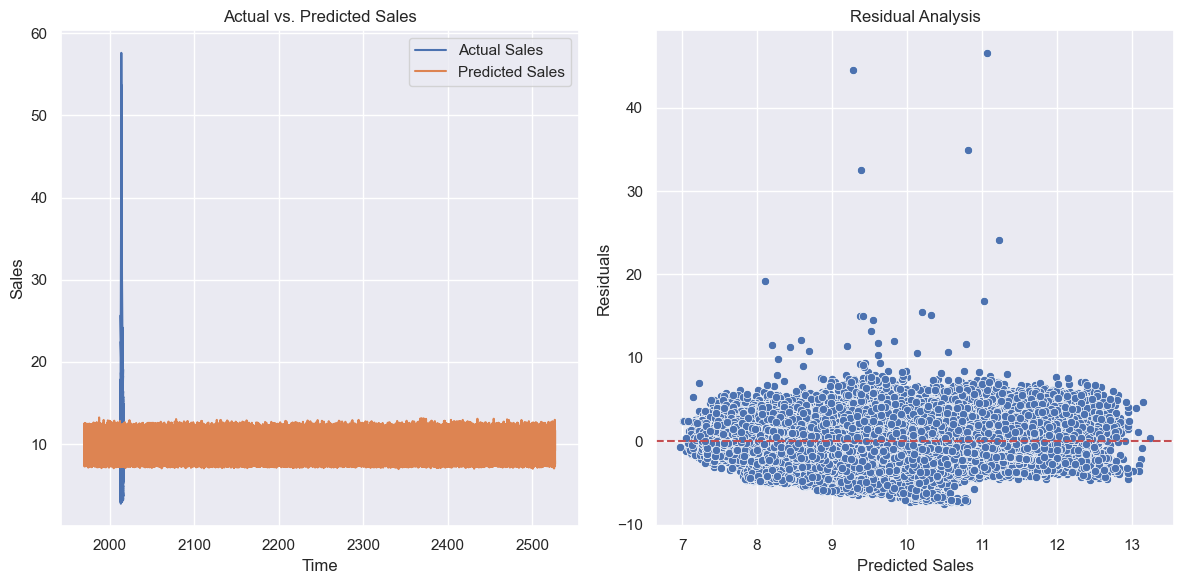

MAE for Store Type '0': 1.2875657932490916
MAE for Store Type '1': 1.2875657932490916
MAE for Store Type '2': 1.2875657932490916
MAE for Store Type '3': 1.2875657932490916


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

# Visualize predictions and residuals

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

plt.plot(y_test, label="Actual Sales")

plt.plot(y_pred, label="Predicted Sales")

plt.xlabel("Time")

plt.ylabel("Sales")

plt.title("Actual vs. Predicted Sales")

plt.legend()

plt.subplot(1, 2, 2)

sns.scatterplot(x=y_pred, y=residuals)

plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicted Sales")

plt.ylabel("Residuals")

plt.title("Residual Analysis")

plt.tight_layout()

plt.show()

from sklearn.metrics import mean_absolute_error

# Segment analysis (example)

store_type_segments = train_merged_data.groupby('StoreType')

for store_type, group in store_type_segments:
    
    segment_mae = mean_absolute_error(y_test, y_pred)
    
    print(f"MAE for Store Type '{store_type}': {segment_mae}")
     


In [127]:
train_merged_data.columns
     

Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'SalesPerCustomer', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd'],
      dtype='object')

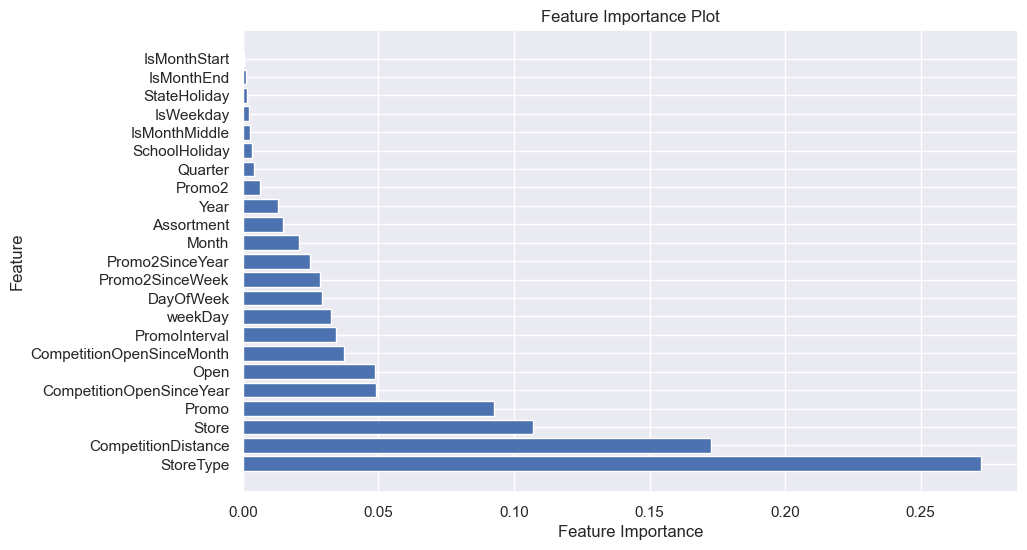

In [128]:
# Define features and target

features = ['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'weekDay', 'IsWeekday', 'Quarter', 'IsMonthStart',
       'IsMonthMiddle', 'IsMonthEnd']

target = 'SalesPerCustomer'

# Assuming train_data_merged contains your preprocessed data

train_features = train_merged_data[features]

train_labels = train_merged_data[target]

model = RandomForestRegressor()

model.fit(train_features, train_labels)

# Retrieve feature importance scores

feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.barh(importance_df['Feature'], importance_df['Importance'])

plt.xlabel('Feature Importance')

plt.ylabel('Feature')

plt.title('Feature Importance Plot')

plt.show()

In [129]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [130]:
predictions = model.predict(X_train)
     

In [131]:
import numpy as np

# Assuming you have 'predictions' as your model's predictions

n_bootstraps = 1000  # Number of bootstrap samples

bootstrap_predictions = np.zeros((len(predictions), n_bootstraps))

for i in range(n_bootstraps):
    
    # Randomly sample data with replacement
    
    bootstrap_indices = np.random.choice(len(predictions), size=len(predictions)
                                         , replace=True)
    bootstrap_sample = predictions[bootstrap_indices]

    # Store the sample in the bootstrap_predictions array
    
    bootstrap_predictions[:, i] = bootstrap_sample

# Calculate percentiles for prediction intervals

lower_percentile = np.percentile(bootstrap_predictions, 2.5, axis=1)

upper_percentile = np.percentile(bootstrap_predictions, 97.5, axis=1)
     


# 2.5 Serialize models



To serve the models you built above, you need to serialize them. 
Save the model with the timestamp(eg. 10-08-2020-16-32-31-00.pkl).
This is necessary so that you can track predictions from various models.

Assume that you’ll make daily predictions. This means you’ll have various
models for predictions hence the reason for serializing the models in the format above. 


In [132]:
from sklearn.metrics import mean_squared_error

random_forest.fit(X_test, y_test)

y_pred_random_forest = random_forest.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

print(f'Random Forest MSE: {mse_random_forest}')

     

Random Forest MSE: 0.05082097167864247


In [133]:
trained_pharmaceutical_sales_model = RandomForestRegressor(n_estimators=100, random_state=42)

trained_pharmaceutical_sales_model.fit(X_test, y_test)

RandomForestRegressor(random_state=42)

In [134]:
import pickle
import datetime

# Example: Assume you have trained a model for Pharmaceutical Sales prediction

# Replace 'model' with your actual trained model

model = trained_pharmaceutical_sales_model

# Generate a timestamp in the desired format (e.g., '10-08-2020-16-32-31-00')

timestamp = datetime.datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')[:-3]  # Remove microseconds

# Define the filename with the timestamp

filename = f"{timestamp}.pkl"

# Serialize and save the model to a file with the timestamp

with open(filename, 'wb') as file:
    
    pickle.dump(model, file)

print(f"Model saved as {filename}")

Model saved as 05-01-2024-14-33-25-595.pkl
